In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"piyush2798","key":"d335827a81b2aa1805fe0c4ce8468236"}'}

In [0]:
!ls

kaggle.json  sample_data


In [0]:
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list -s dogs-vs-cats

ref                                                   title                                               size  lastUpdated          downloadCount  
----------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
biaiscience/dogs-vs-cats                              Dogs vs Cats                                       814MB  2017-12-05 14:03:33           1983  
nafisur/dogs-vs-cats                                  Dogs_vs_cats                                       217MB  2018-04-25 08:01:49           1625  
dhirensk/cats-vs-dogs-training8000test2000            Cats vs Dogs Training8000Test2000                  218MB  2018-11-21 09:38:07            135  
salader/dogs-vs-cats                                  dogs vs cats                                       545MB  2018-11-30 19:31:13            409  
tongpython/cat-and-dog                                Cat and Dog                                        2

In [0]:
!kaggle datasets download -d biaiscience/dogs-vs-cats 

 97% 793M/814M [00:16<00:00, 32.1MB/s]
100% 814M/814M [00:16<00:00, 50.9MB/s]


In [0]:
! ls 

In [0]:
! unzip \*.zip

Archive:  dogs-vs-cats.zip
  inflating: test.zip                
  inflating: train.zip               


In [0]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data  test.zip  train.zip


In [0]:
! unzip \*.zip

Archive:  dogs-vs-cats.zip
replace test.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.zip                
replace train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.zip               y


Archive:  test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test

In [0]:
! ls

In [0]:
###Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,Activation,MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [0]:
import os
print(os.listdir())

['.config', 'dogs-vs-cats.zip', 'test.zip', 'train', 'train.zip', 'kaggle.json', 'test', 'sample_data']


In [0]:

filenames = os.listdir("train")
c = []
for f in filenames:
  ca = f.split('.')[0]
  if ca == "dog":
    c.append(1)
  else:
    c.append(0)
    
    
df = pd.DataFrame({'filename':filenames,'category':c})

In [0]:
df.head()

,filename,category
0,dog.3183.jpg,1
1,dog.1449.jpg,1
2,dog.11540.jpg,1
3,dog.4238.jpg,1
4,cat.335.jpg,0


In [0]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

In [0]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

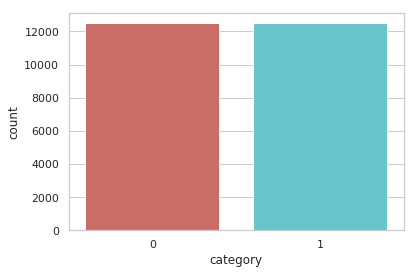

In [0]:
sns.countplot(x='category',data=df,palette='hls')
plt.show()

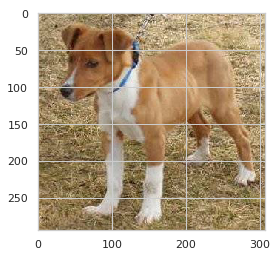

In [0]:
import random
sample = random.choice(filenames)
image = load_img('train/'+sample)
plt.imshow(image)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()



# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256,256, 3)))
model.add(MaxPooling2D((2, 2)))

# block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# block 4
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))




model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

W0906 08:09:11.998073 140351351691136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 08:09:12.040292 140351351691136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 08:09:12.048591 140351351691136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 08:09:12.080739 140351351691136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 08:09:12.245260 140351351691136 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)      

In [0]:

from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [0]:
earlystop = EarlyStopping(patience=10)




learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



callbacks = [earlystop, learning_rate_reduction]



In [0]:
df['category'] = df['category'].replace({0:'cat',1:'dog'})

In [0]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [0]:
train_df,validate_df = train_test_split(df,test_size=0.20,random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

In [0]:

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=batch_size
)




Found 5000 validated image filenames belonging to 2 classes.


In [0]:


example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(256,256),
    class_mode='categorical'
)




Found 1 validated image filenames belonging to 1 classes.


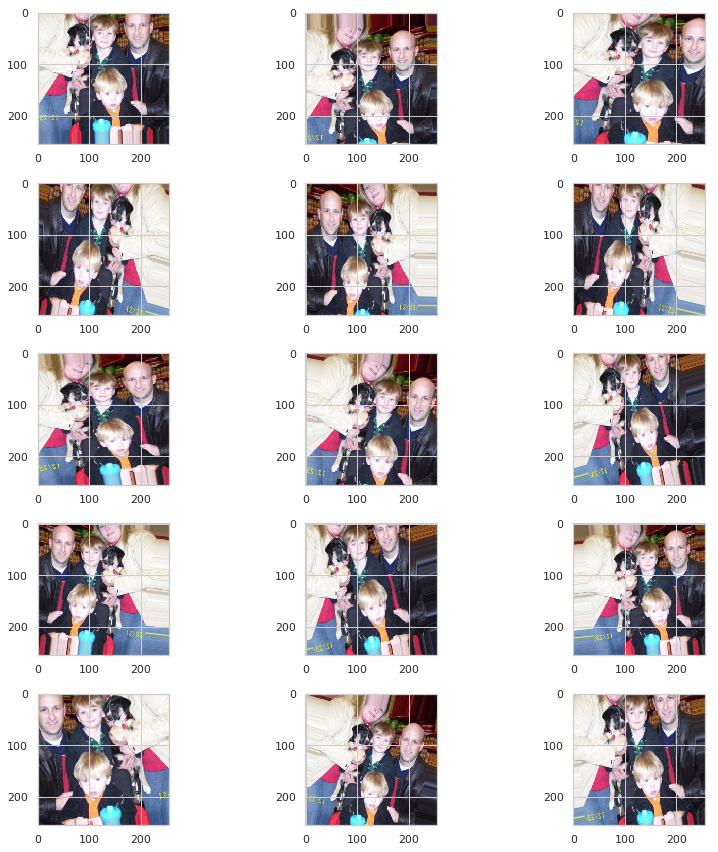

In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
epochs=50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)



Epoch 1/50
625/625 [==============================] - 381s 610ms/step - loss: 0.6507 - acc: 0.6420 - val_loss: 0.5128 - val_acc: 0.7410
Epoch 2/50
625/625 [==============================] - 375s 600ms/step - loss: 0.5257 - acc: 0.7395 - val_loss: 0.5389 - val_acc: 0.7199
Epoch 3/50
625/625 [==============================] - 371s 594ms/step - loss: 0.4728 - acc: 0.7757 - val_loss: 0.3994 - val_acc: 0.8284
Epoch 4/50
625/625 [==============================] - 371s 593ms/step - loss: 0.4439 - acc: 0.7981 - val_loss: 0.3844 - val_acc: 0.8333
Epoch 5/50
625/625 [==============================] - 372s 596ms/step - loss: 0.4033 - acc: 0.8196 - val_loss: 0.4550 - val_acc: 0.8081
Epoch 6/50
625/625 [==============================] - 371s 594ms/step - loss: 0.3688 - acc: 0.8380 - val_loss: 0.6466 - val_acc: 0.7154

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/50
625/625 [==============================] - 374s 598ms/step - loss: 0.3115 - acc: 0.8641 - va

In [0]:
model.save_weights("model.h1")

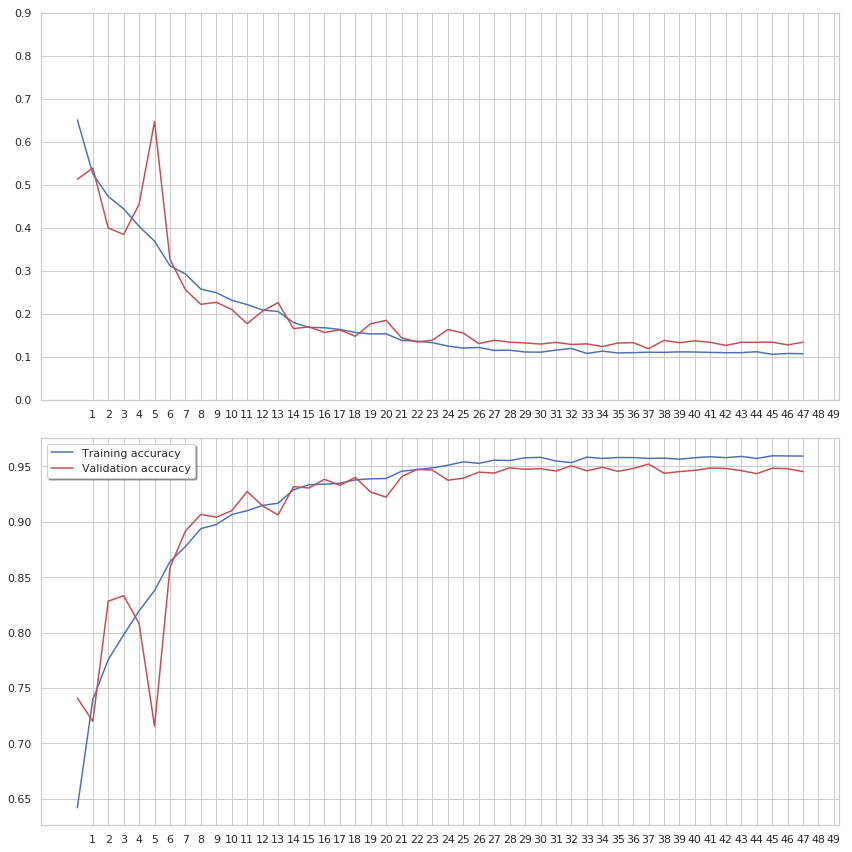

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))
ax1.plot(history.history['loss'],color='b',label='Training Loss')
ax1.plot(history.history['val_loss'],color='r',label='Validation Loss')
ax1.set_xticks(np.arange(1,epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))
ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


In [0]:
test_filenames = os.listdir('test')
test_df = pd.DataFrame({'filename' :test_filenames})
nb_samples = test_df.shape[0]

In [0]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df,'test',x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(256,256),
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator,steps = np.ceil(nb_samples/batch_size))

In [0]:
test_df['category'] = np.argmax(predict,axis=-1)

In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)



In [0]:


test_df['category'].value_counts().plot.bar()



In [0]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test/"+filename, target_size=(128,128))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [0]:


submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)



In [0]:
from google.colab import files
files.download('submission.csv') 

In [0]:
!ls